In [ ]:
#Connect your Google Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import os
from imutils import paths
from PIL import Image
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout
from keras.models import Model
import tensorflow as tf
import cv2
import io
from skimage.filters import gaussian
from skimage import exposure
import matplotlib.image as mpimg
import tensorflow
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, ReLU, BatchNormalization
from tensorflow.keras.layers import Add, GlobalAveragePooling2D
from skimage import io
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam, SGD, RMSprop, Adamax, Nadam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from keras import backend as k
from keras.preprocessing.image import ImageDataGenerator
from skimage import exposure
import keras
import numpy as np
import os
import random
import shutil
import pandas as pd
from keras import optimizers
from keras.models import Sequential,Model
from keras.layers import Dropout, Flatten, Dense,Input, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.applications.imagenet_utils import preprocess_input
from keras.initializers import RandomNormal
from sklearn.utils import shuffle
import io
from PIL import Image as pil_image

In [ ]:
#Here we set the data generators for applying data augmentation methods
train_datagen = ImageDataGenerator()
train_df =pd.read_csv('/content/drive/MyDrive/COVID-CTset (1)/CSV/train1.csv') #raed train csv file
test_df = pd.read_csv('/content/drive/MyDrive/COVID-CTset (1)/CSV/test1.csv')

In [ ]:
# generating one row 
train_df = train_df.sample(n =1900, random_state=1)
    
# display
train_df

,filename,class
3268,normal4_patient175_SR_2_IM00012.tif,normal
3473,normal4_patient186_SR_2_IM00043.tif,normal
2328,cdunnormal_patient164_SR_2_IM00024.tif,normal
1051,137covid_patient80_SR_3_IM00021.tif,covid
993,137covid_patient76_SR_3_IM00010.tif,covid
...,...,...
38,137covid_patient24_SR_2_IM00009.tif,covid
2900,normal1_patient183_SR_2_IM00014.tif,normal
1941,cdnormal4_patient150_SR_2_IM00033.tif,normal
864,137covid_patient43_SR_3_IM00027.tif,covid


In [ ]:
train_df.groupby('class').count()

,filename
class,
covid,952
normal,948


In [ ]:
test_df = test_df.drop(test_df[test_df['class']=='normal'].sample(frac =.94).index)

In [ ]:
# generating one row
test_df = test_df.sample(n =200, random_state=1)
    
# display
test_df

,filename,class
363,137covid_patient115_SR_4_IM00004.tif,covid
41,137covid_patient10_SR_2_IM00024.tif,covid
7151,normal5_patient394_SR_2_IM00026.tif,normal
1726,normal1_patient239_SR_2_IM00009.tif,normal
35,137covid_patient10_SR_2_IM00015.tif,covid
...,...,...
5600,normal4_patient228_SR_2_IM00010.tif,normal
354,137covid_patient105_SR_4_IM00121.tif,covid
6914,normal5_patient386_SR_2_IM00007.tif,normal
241,137covid_patient118_SR_3_IM00014.tif,covid


In [ ]:
test_df.groupby('class').count()

,filename
class,
covid,93
normal,107


In [ ]:
ls /content/drive/MyDrive/Dataset_TA/Clahe

137covid_patient100_SR_2_IM00028.tif    normal2_patient282_SR_2_IM00044.tif
137covid_patient100_SR_2_IM00029.tif    normal2_patient282_SR_2_IM00045.tif
137covid_patient100_SR_2_IM00045.tif    normal2_patient283_SR_2_IM00007.tif
137covid_patient100_SR_3_IM00026.tif    normal2_patient283_SR_2_IM00008.tif
137covid_patient100_SR_3_IM00027.tif    normal2_patient283_SR_2_IM00009.tif
137covid_patient100_SR_3_IM00028.tif    normal2_patient283_SR_2_IM00010.tif
137covid_patient101_SR_2_IM00012.tif    normal2_patient283_SR_2_IM00011.tif
137covid_patient101_SR_2_IM00013.tif    normal2_patient283_SR_2_IM00012.tif
137covid_patient101_SR_2_IM00014.tif    normal2_patient283_SR_2_IM00013.tif
137covid_patient101_SR_2_IM00016.tif    normal2_patient283_SR_2_IM00014.tif
137covid_patient101_SR_2_IM00017.tif    normal2_patient283_SR_2_IM00023.tif
137covid_patient101_SR_2_IM00018.tif    normal2_patient283_SR_2_IM00025.tif
137covid_patient101_SR_2_IM00019.tif    normal2_patient283_SR_2_IM00026.tif
137covid_pat

In [ ]:
#Create the generators
train_generator = train_datagen.flow_from_dataframe(
      dataframe=train_df,
      directory='/content/drive/MyDrive/Dataset_TA/Gaussian/',
      x_col="filename",
      y_col="class",
      class_mode='sparse',shuffle=True)
test_generator = train_datagen.flow_from_dataframe(
        dataframe=test_df,
        directory='/content/drive/MyDrive/Dataset_TA/Gaussian/',
        x_col="filename",
        y_col="class",
        class_mode='sparse',shuffle=True)

Found 1900 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


In [ ]:
data = []
width = 224
height = 224
dsize = (width, height)
for num,img_name in enumerate(train_generator.filenames): #load image
    # gt_ind=test_generator.classes[num] #get the loaded image class index
    img=cv2.imread(os.path.join('/content/drive/MyDrive/Dataset_TA/Clahe/',img_name),-1) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,dsize)
    # img = exposure.equalize_adapthist(img)
    img = np.array(img)
    data.append(img)

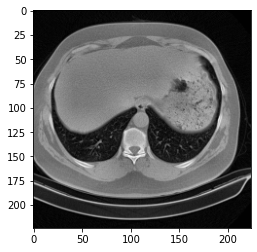

In [ ]:
plt.imshow(data[1])

In [ ]:
data[1]

In [ ]:
data = np.array(data)
data.shape

(1900, 224, 224, 3)

In [ ]:
from sklearn.model_selection import train_test_split
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, valX, trainY, valY) = train_test_split(np.array(data),	np.array(train_generator.classes), test_size=0.25)
#trainY = np.asarray(trainY).astype('float32').reshape((-1,1))
#testY = np.asarray(testY).astype('float32').reshape((-1,1))
print(trainX.shape)
print(valX.shape)
print(trainY.shape)
print(valY.shape)

(1425, 224, 224, 3)
(475, 224, 224, 3)
(1425,)
(475,)


In [ ]:
k.clear_session()
def stem(inputs):
    """ Construct the Stem Convolution Group
        inputs : input vector
    """
    # First Convolutional layer, where pooled feature maps will be reduced by 75%
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu', kernel_initializer="he_normal")(inputs)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    return x
    
def learner(x):
    """ Construct the Learner
        x  : input to the learner
    """
    # First Residual Block Group of 64 filters
    x = residual_group(x, 64, 3)

    # Second Residual Block Group of 128 filters
    x = residual_group(x, 128, 3)

    # Third Residual Block Group of 256 filters
    x = residual_group(x, 256, 5)

    # Fourth Residual Block Group of 512 filters
    x = residual_group(x, 512, 2, False)
    return x

    
def residual_group(x, n_filters, n_blocks, conv=True):
    """ Construct a Residual Group
        x        : input to the group
        n_filters: number of filters
        n_blocks : number of blocks in the group
        conv     : flag to include the convolution block connector
    """
    for _ in range(n_blocks):
        x = residual_block(x, n_filters)

    # Double the size of filters and reduce feature maps by 75% (strides=2, 2) to fit the next Residual Group
    if conv:
        x = conv_block(x, n_filters * 2)
    return x

def residual_block(x, n_filters):
    """ Construct a Residual Block of Convolutions
        x        : input into the block
        n_filters: number of filters
    """
    shortcut = x
    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",
                      activation="relu", kernel_initializer="he_normal")(x)
    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",
                      activation="relu", kernel_initializer="he_normal")(x)
    x = Add()([shortcut, x])
    return x

def conv_block(x, n_filters):
    """ Construct Block of Convolutions without Pooling
        x        : input into the block
        n_filters: number of filters
    """
    x = Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same",
                  activation="relu", kernel_initializer="he_normal")(x)
    x = Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same",
                  activation="relu", kernel_initializer="he_normal")(x)
    return x
    
def classifier(x, n_classes):
    """ Construct the Classifier Group
        x         : input vector
        n_classes : number of output classes
    """
    # Pool at the end of all the convolutional residual blocks
    x = GlobalAveragePooling2D()(x)

    # Final Dense Outputting Layer for the outputs
    outputs = Dense(n_classes, activation='softmax', kernel_initializer='he_normal')(x)
    return outputs

# The input tensor
inputs = Input(shape=(224, 224, 3))

# The Stem Convolution Group
x = stem(inputs)

# The learner
x = learner(x)
    
# The Classifier for 1000 classes
outputs = classifier(x, 2)

# Instantiate the Model
model = Model(inputs, outputs)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_ResNetAdamaxDemo.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto')

In [ ]:
from keras.optimizers import Adam, SGD, RMSprop, Adamax

# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adamax(lr=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=20, batch_size=32, callbacks=[es,checkpoint])

[INFO] training network...
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


45/45 [==============================] - 19s 278ms/step - loss: 446717.8735 - accuracy: 0.5336 - val_loss: 0.5697 - val_accuracy: 0.7053

Epoch 00001: val_accuracy did not improve from 0.97895
Epoch 2/20
45/45 [==============================] - 11s 248ms/step - loss: 0.6835 - accuracy: 0.6640 - val_loss: 0.4940 - val_accuracy: 0.7937

Epoch 00002: val_accuracy did not improve from 0.97895
Epoch 3/20
45/45 [==============================] - 11s 249ms/step - loss: 0.6331 - accuracy: 0.7416 - val_loss: 0.4720 - val_accuracy: 0.8463

Epoch 00003: val_accuracy did not improve from 0.97895
Epoch 4/20
45/45 [==============================] - 11s 248ms/step - loss: 0.5044 - accuracy: 0.7714 - val_loss: 0.4270 - val_accuracy: 0.8295

Epoch 00004: val_accuracy did not improve from 0.97895
Epoch 5/20
45/45 [==============================] - 11s 249ms/step - loss: 0.4936 - accuracy: 0.8124 - val_loss: 0.4973 - val_accuracy: 0.7389

Epoch 00005: val_accuracy did not improve from 0.97895
Epoch 6/20


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


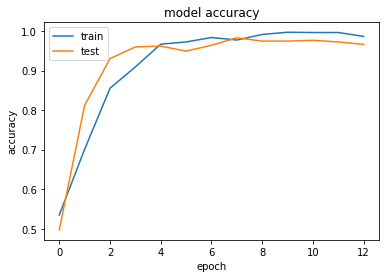

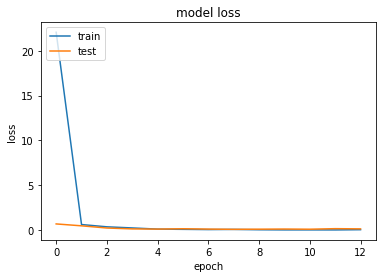

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
predictions = model.predict(valX, batch_size=32)
print(classification_report(valY,predictions.argmax(axis=1),target_names = train_generator.class_indices))

              precision    recall  f1-score   support

       covid       0.98      0.98      0.98       221
      normal       0.98      0.98      0.98       254

    accuracy                           0.98       475
   macro avg       0.98      0.98      0.98       475
weighted avg       0.98      0.98      0.98       475



In [ ]:
cf_matrix = confusion_matrix(valY,predictions.argmax(axis=1))
print(cf_matrix)

[[217   4]
 [  4 250]]


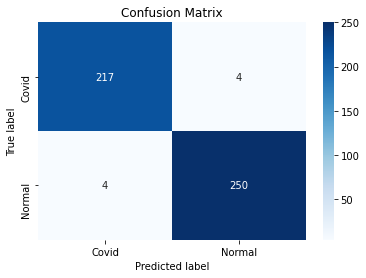

In [ ]:
cm = cf_matrix

import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot();
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
# labels, title and ticks
ax.set_xlabel('Predicted label');ax.set_ylabel('True label'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Covid','Normal']); 
ax.yaxis.set_ticklabels(['Covid','Normal']);

In [ ]:
data2 = []
for num,img_name in enumerate(test_generator.filenames): #load image
    # gt_ind=test_generator.classes[num] #get the loaded image class index
    img=cv2.imread(os.path.join('/content/drive/MyDrive/Dataset_TA/Gaussian/',img_name),-1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = exposure.equalize_adapthist(img)
    img = np.array(img)
    data2.append(img)

In [ ]:
testX, testY = np.array(data2), np.array(test_generator.classes)

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/demo/best_weight_ResNetAdamTest.h5')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY,predictions.argmax(axis=1),target_names = test_generator.class_indices))

              precision    recall  f1-score   support

       covid       0.93      1.00      0.96        93
      normal       1.00      0.93      0.97       107

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



In [ ]:
cf_matrix = confusion_matrix(testY,predictions.argmax(axis=1))
print(cf_matrix)

[[ 93   0]
 [  7 100]]


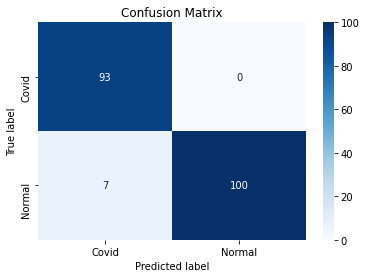

In [ ]:
cm = cf_matrix

import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot();
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
# labels, title and ticks
ax.set_xlabel('Predicted label');ax.set_ylabel('True label'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Covid','Normal']); 
ax.yaxis.set_ticklabels(['Covid','Normal']);

In [ ]:
print("Evaluate on test data")
results = model.evaluate(testX, testY, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
7/7 [==============================] - 2s 80ms/step - loss: 0.1495 - accuracy: 0.9650
test loss, test acc: [0.14951437711715698, 0.9649999737739563]
